## 실습 1: 사람 키로 몸무게 예측
### 1) 사람 키와 몸무게 두 변수에 대한 산점도 그리기
### 2) 사람 키(키) 데이터를 가지고 몸무게를 예측하는 선형 회귀모형 만들어보기 (train_data : test_data = 7:3 split)
### 3) 회귀식의 기울기와 y 절편 구하기
### 4) R^2, MSE 계산하기

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("student.csv", encoding = 'euc-kr')

In [14]:
print("데이터셋 크기: ", df.shape)
df.head()

데이터셋 크기:  (9686, 25)


,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9686 non-null   object 
 1   최종가중치       9686 non-null   float64
 2   학교ID        9686 non-null   object 
 3   도시규모        9686 non-null   object 
 4   도시규모별분석용    9686 non-null   object 
 5   학년도         9686 non-null   int64  
 6   광역시도        9686 non-null   object 
 7   시도별         9686 non-null   object 
 8   학교급별        9686 non-null   int64  
 9   학교명         9686 non-null   object 
 10  공학여부        9686 non-null   object 
 11  학년          9686 non-null   int64  
 12  반           9686 non-null   int64  
 13  성별          9686 non-null   object 
 14  건강검진일       9686 non-null   int64  
 15  키           9686 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

In [16]:
print(df.isnull().sum())

ID               0
최종가중치            0
학교ID             0
도시규모             0
도시규모별분석용         0
학년도              0
광역시도             0
시도별              0
학교급별             0
학교명              0
공학여부             0
학년               0
반                0
성별               0
건강검진일            0
키                0
몸무게              4
혈당식전mgdl      9348
총콜레스테롤mgdl    9347
ASTUL         9350
ALTUL         9349
혈색소gdl        9108
간염검사          8855
수축기           6661
이완기           6661
dtype: int64


In [17]:
df.describe()

,최종가중치,학년도,학교급별,학년,반,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,수축기,이완기
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9.686000e+03,9686.000000,9682.000000,338.00000,339.000000,336.000000,337.000000,578.000000,3025.000000,3025.000000
mean,104.894487,2015.0,1.995767,2.567933,2.659096,2.015047e+07,154.564444,50.207591,92.14497,173.516519,27.824405,30.311573,12.976990,104.830083,62.987438
std,39.376988,0.0,0.856499,1.414243,2.601067,1.014788e+02,16.968590,17.075953,10.49571,32.567571,19.327395,32.191960,1.092454,12.661348,7.948402
min,23.325794,2015.0,1.000000,1.000000,1.000000,2.015023e+07,107.700000,15.900000,65.00000,102.000000,11.000000,8.000000,9.000000,65.000000,23.000000
25%,76.966829,2015.0,1.000000,1.000000,1.000000,2.015041e+07,142.000000,37.200000,85.00000,148.500000,19.000000,14.000000,12.400000,98.000000,60.000000
50%,99.963287,2015.0,2.000000,2.000000,1.000000,2.015043e+07,158.700000,50.700000,91.00000,170.000000,24.000000,20.000000,13.200000,105.000000,62.000000
75%,133.231158,2015.0,3.000000,3.000000,3.000000,2.015051e+07,167.200000,60.600000,99.00000,191.000000,30.000000,32.000000,13.675000,112.000000,69.000000
max,248.300844,2015.0,3.000000,6.000000,15.000000,2.015091e+07,194.200000,130.700000,132.00000,300.000000,186.000000,272.000000,15.700000,180.000000,98.000000


In [18]:
print(sorted(df['몸무게'].unique()))

[16.4, 16.7, 17.0, 17.3, 17.7, 17.8, 18.5, 18.6, 18.7, 19.1, 19.2, 19.4, 19.5, 19.7, 20.5, 21.4, 21.5, 21.7, 21.8, 22.3, 23.2, 24.9, 25.1, 25.6, 25.9, 27.6, 28.0, 28.5, 28.6, 29.3, 29.7, 29.8, 30.1, 30.7, 31.2, 31.4, 32.6, 32.7, 33.4, 33.7, 33.8, 33.9, 34.9, 35.8, 35.9, 36.1, 36.4, 36.5, 36.6, 36.9, 37.1, 37.4, 37.6, 37.8, 37.9, 38.0, 38.5, 38.6, 38.8, 38.9, 39.4, 39.6, 39.7, 39.9, 40.3, 40.7, 40.9, 41.0, 41.2, 41.4, 41.5, 41.7, 42.0, 42.1, 42.3, 42.4, 42.5, 42.6, 42.8, 42.9, 43.0, 43.1, 43.2, 43.6, 43.7, 44.1, 44.3, 44.4, 44.6, 45.1, 45.2, 45.3, 45.5, 45.7, 45.9, 46.0, 46.5, 46.6, 46.9, 47.2, 47.4, 47.6, 47.7, 47.8, 47.9, 48.1, 48.4, 48.7, 48.9, 49.0, 49.1, 49.2, 49.3, 49.6, 49.7, 50.2, 50.3, 50.7, 51.1, 51.3, 51.6, 51.7, 51.8, 52.0, 52.5, 52.6, 52.8, 53.1, 53.5, 53.6, 53.9, 54.6, 54.8, 54.9, 55.1, 56.3, 56.5, 56.9, 57.0, 57.6, 57.7, 57.8, 58.2, 58.7, 58.8, 58.9, 59.1, 59.3, 60.2, 60.3, 62.1, 63.8, 64.5, 64.9, 65.7, 66.4, 68.9, 70.6, 71.6, nan, 15.9, 16.8, 17.4, 17.6, 17.9, 18.0, 18.2

In [19]:
df.dropna(subset=['몸무게'], axis = 0, inplace=True)

In [20]:
print(df.isnull().sum())

ID               0
최종가중치            0
학교ID             0
도시규모             0
도시규모별분석용         0
학년도              0
광역시도             0
시도별              0
학교급별             0
학교명              0
공학여부             0
학년               0
반                0
성별               0
건강검진일            0
키                0
몸무게              0
혈당식전mgdl      9344
총콜레스테롤mgdl    9343
ASTUL         9346
ALTUL         9345
혈색소gdl        9104
간염검사          8851
수축기           6657
이완기           6657
dtype: int64


In [22]:
ndf = df[['몸무게', '키']]
ndf.head()

,몸무게,키
0,27.3,125.8
1,25.4,124.3
2,23.5,119.2
3,20.0,115.0
4,33.5,120.0


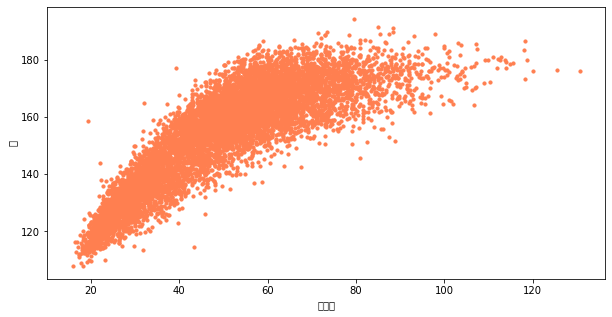

In [23]:
ndf.plot(kind='scatter', x='몸무게', y='키', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

In [29]:
X = ndf[['몸무게']]
Y = ndf['키']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=10)

print('train data : ', X_train.shape)
print('test data : ', X_test.shape)

train data :  (6777, 1)
test data :  (2905, 1)


In [30]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
print('기울기 : ', lr.coef_)
print('y절편 : ', lr.intercept_)

기울기 :  [0.84411704]
y절편 :  112.14239961178247


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r_square = r2_score(Y_test, Y_pred)

print('MSE : ', mse)
print('R^2 : ', r_square)

MSE :  81.85078314513058
R^2 :  0.7123193588991541


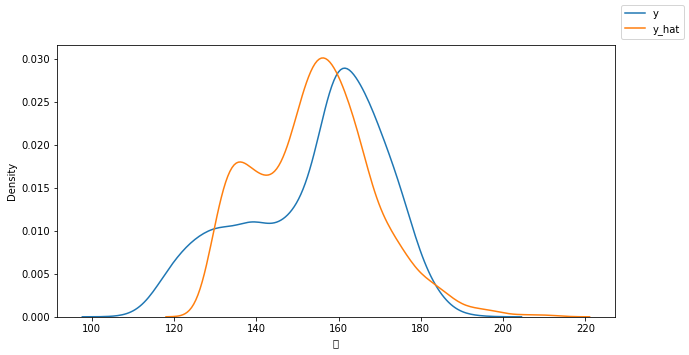

In [34]:
y_hat = lr.predict(X_test)

fig = plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False)
ax2 = sns.distplot(y_hat, hist=False, ax=ax1)
fig.legend(labels=['y', 'y_hat'])
plt.show()
plt.close()

## 실습 2: 보스톤 집값 예측 모델
### 1) 주택 방 수와 집값 두 변수에 대한 산점도 그리기
### 2) 주택당 방 수(RM) 데이터를 가지고 집값(Target) 예측하는 선형 회귀모형 만들어보기 (train_data : test_data = 7:3 split)
### 3) 회귀식의 기울기와 y 절편 구하기
### 4)  R^2, MSE 계산하기

**타겟 변수**  
>Target: 1978년도 보스턴 주택 가격  
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)   

  
**특성 변수**  
>CRIM: 범죄율  
INDUS: 비소매상업지역 면적 비율  
NOX: 일산화질소 농도  
RM: 주택당 방 수  
LSTAT: 인구 중 하위 계층 비율  
B: 인구 중 흑인 비율  
PTRATIO: 학생/교사 비율  
ZN: 25,000 평방피트를 초과 거주지역 비율  
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
AGE: 1940년 이전에 건축된 주택의 비율  
RAD: 방사형 고속도로까지의 거리  
DIS: 직업센터의 거리  
TAX: 재산세율  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv("Boston_house.csv", encoding='euc-kr')

In [36]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [37]:
print(df.isnull().sum())

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64


In [38]:
ndf = df[['RM','Target']]
ndf.head()

,RM,Target
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


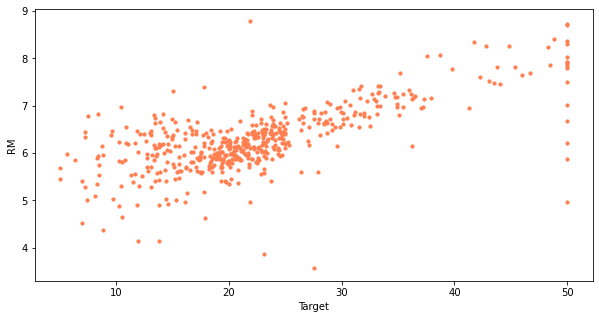

In [39]:
ndf.plot(kind='scatter', x='Target', y='RM', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

In [43]:
X=ndf[['Target']]
Y=ndf['RM']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=10)

print('train data : ', X_train.shape)
print('test data : ',X_test.shape)

train data :  (354, 1)
test data :  (152, 1)


In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [45]:
print('기울기 : ', lr.coef_)
print('y절편 : ', lr.intercept_)

기울기 :  [0.05050104]
y절편 :  5.144889857690449


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r_square = r2_score(Y_test, Y_pred)

print('MSE : ', mse)
print('R^2 L' , r_square)

MSE :  0.27247707741549354
R^2 L 0.5420916543133956


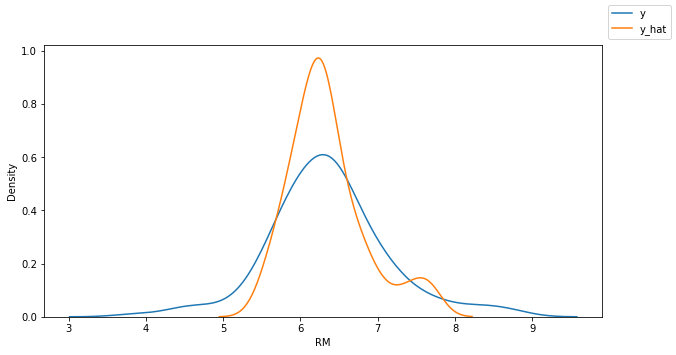

In [47]:
y_hat = lr.predict(X_test)

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y_test, hist = False)
ax2 = sns.distplot(y_hat, hist = False, ax=ax1)
fig.legend(labels=['y','y_hat'])
plt.show()
plt.close()